<a href="https://colab.research.google.com/github/Farahsetyaningsih/lifestyle/blob/main/Analisis_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To handle data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# For ML tasks
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/Sleep health and lifestyle dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
#cek statistik data
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
data.shape

(374, 13)

In [ ]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
data['Sleep Disorder'] .value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


mengisi missing value

In [ ]:
data['Sleep Disorder']=data['Sleep Disorder'] .fillna('No Disorder')

In [ ]:
display(pd.DataFrame(data))

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
data['Sleep Disorder'] .value_counts()

,count
Sleep Disorder,
No Disorder,219
Sleep Apnea,78
Insomnia,77


In [ ]:
data.isnull() .sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
sleep_disorder_counts = data['Sleep Disorder'].value_counts()
sleep_disorder_counts

,count
Sleep Disorder,
No Disorder,219
Sleep Apnea,78
Insomnia,77


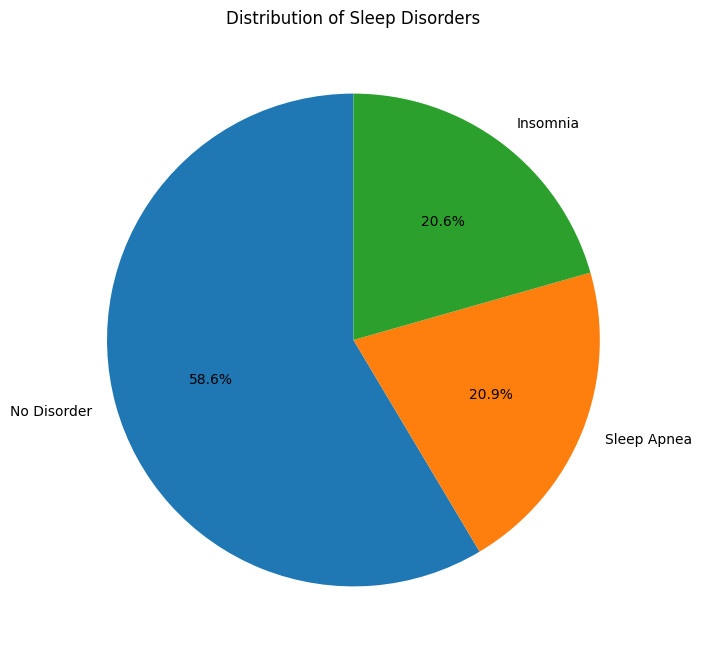

In [ ]:
label_mapping = {
    'Insomnia': 'Insomnia',
    'No Disorder': 'No Disorder',
    'Sleep Apnea': 'Sleep Apnea'
}

# Get labels and sizes for the pie chart using the mapping
labels = [label_mapping[label] for label in sleep_disorder_counts.index]
sizes = sleep_disorder_counts.values

# Create the pie chart with disorder names and percentage values
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sleep Disorders')
plt.show()

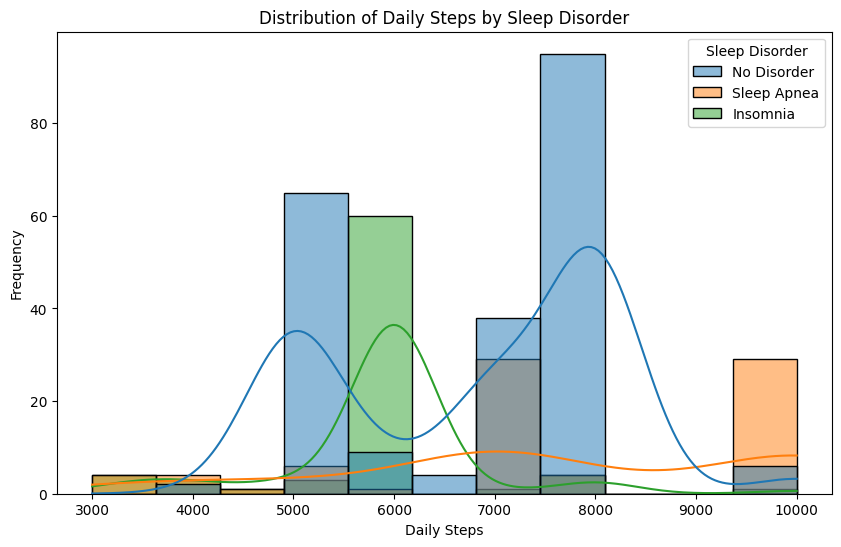

In [ ]:
# Diagram distribusi antara variabel daily steps dan sleep disorder

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Daily Steps', hue='Sleep Disorder', kde=True)
plt.title('Distribution of Daily Steps by Sleep Disorder')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.show()

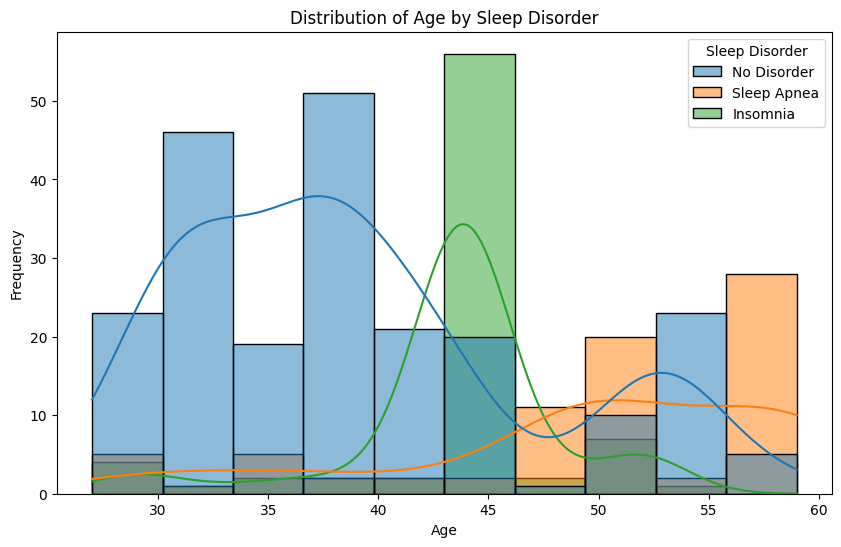

In [ ]:
# Diagram distribusi antara variabel daily steps dan sleep disorder

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Sleep Disorder', kde=True)
plt.title('Distribution of Age by Sleep Disorder')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

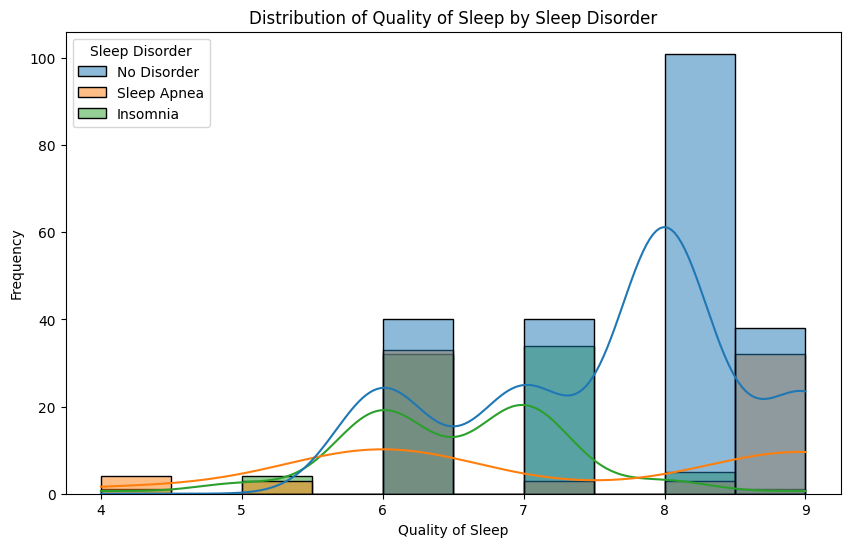

In [ ]:
# Diagram distribusi antara variabel daily steps dan sleep disorder

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Quality of Sleep', hue='Sleep Disorder', kde=True)
plt.title('Distribution of Quality of Sleep by Sleep Disorder')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

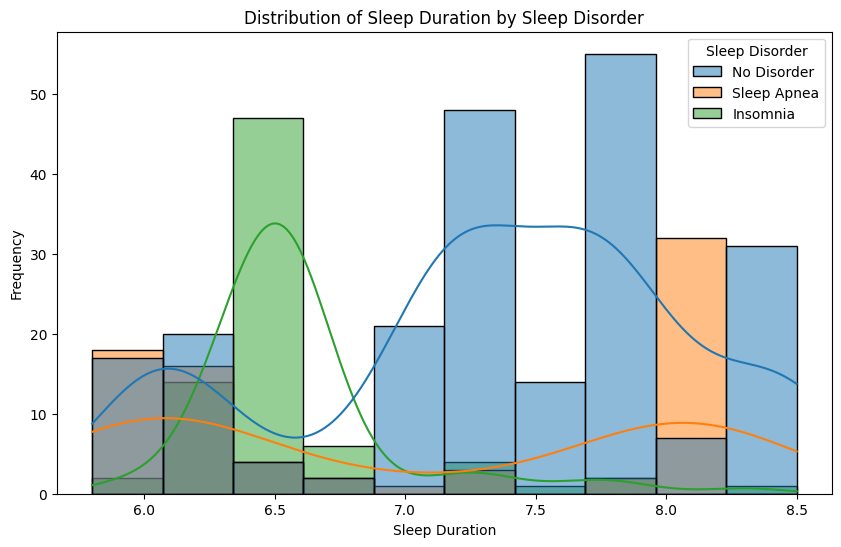

In [ ]:
# Diagram distribusi antara variabel daily steps dan sleep disorder

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Sleep Duration', hue='Sleep Disorder', kde=True)
plt.title('Distribution of Sleep Duration by Sleep Disorder')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.show()

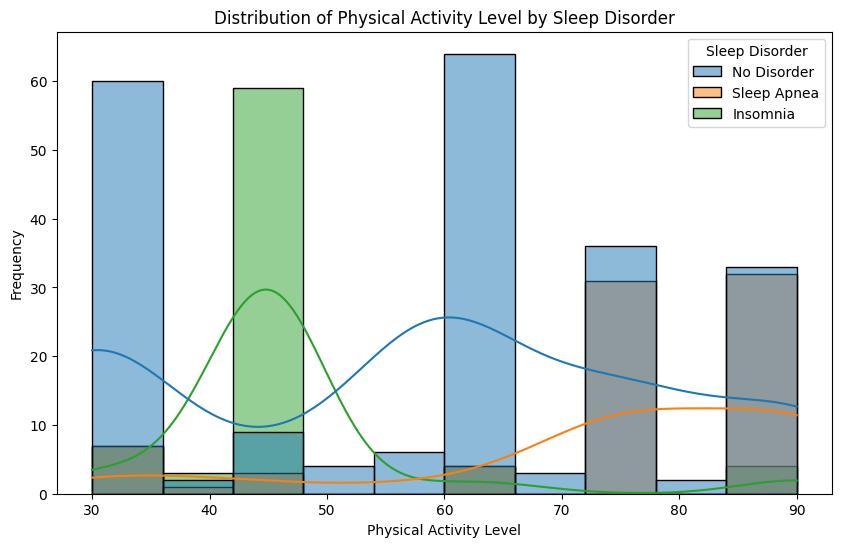

In [ ]:
# Diagram distribusi antara variabel daily steps dan sleep disorder

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Physical Activity Level', hue='Sleep Disorder', kde=True)
plt.title('Distribution of Physical Activity Level by Sleep Disorder')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()

data duplikat

In [ ]:
data.duplicated().sum()

0

Splitting

In [ ]:
X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (299, 12)
Ukuran X_test: (75, 12)
Ukuran y_train: (299,)
Ukuran y_test: (75,)


In [ ]:
print(X_train)

     Person ID  Gender  Age         Occupation  Sleep Duration  \
192        193    Male   43        Salesperson             6.5   
75          76    Male   33             Doctor             6.0   
84          85    Male   35  Software Engineer             7.5   
362        363  Female   59              Nurse             8.2   
16          17  Female   29              Nurse             6.5   
..         ...     ...  ...                ...             ...   
71          72    Male   33             Doctor             6.1   
106        107  Female   37              Nurse             6.1   
270        271  Female   49              Nurse             6.1   
348        349  Female   57              Nurse             8.2   
102        103  Female   36            Teacher             7.2   

     Quality of Sleep  Physical Activity Level  Stress Level   BMI Category  \
192                 6                       45             7     Overweight   
75                  6                       30   

In [ ]:
print(y_train)

192       Insomnia
75     No Disorder
84     No Disorder
362    Sleep Apnea
16     Sleep Apnea
          ...     
71     No Disorder
106    No Disorder
270    Sleep Apnea
348    Sleep Apnea
102    No Disorder
Name: Sleep Disorder, Length: 299, dtype: object


In [ ]:
print(X_test)

     Person ID  Gender  Age   Occupation  Sleep Duration  Quality of Sleep  \
329        330  Female   53     Engineer             8.5                 9   
33          34    Male   31       Doctor             6.1                 6   
15          16    Male   29       Doctor             6.0                 6   
325        326  Female   53     Engineer             8.5                 9   
57          58    Male   32       Doctor             6.0                 6   
..         ...     ...  ...          ...             ...               ...   
94          95  Female   36   Accountant             7.2                 8   
195        196    Male   43  Salesperson             6.5                 6   
312        313  Female   52     Engineer             8.4                 9   
292        293  Female   50        Nurse             6.1                 6   
372        373  Female   59        Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category Blood P

In [ ]:
print(y_test)

329    No Disorder
33     No Disorder
15     No Disorder
325    No Disorder
57     No Disorder
          ...     
94        Insomnia
195       Insomnia
312    No Disorder
292    Sleep Apnea
372    Sleep Apnea
Name: Sleep Disorder, Length: 75, dtype: object


Feature Selection

In [ ]:
X_train.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps'],
      dtype='object')

In [ ]:
features = ['Age', 'Quality of Sleep', 'Daily Steps', 'Sleep Duration', 'Physical Activity Level']
target = ['Sleep Disorder']

In [ ]:
X = data[features]
y = data[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (299, 5)
Ukuran X_test: (75, 5)
Ukuran y_train: (299, 1)
Ukuran y_test: (75, 1)


In [ ]:
print(X_train)

     Age  Quality of Sleep  Daily Steps  Sleep Duration  \
192   43                 6         6000             6.5   
75    33                 6         5000             6.0   
84    35                 8         8000             7.5   
362   59                 9         7000             8.2   
16    29                 5         4000             6.5   
..   ...               ...          ...             ...   
71    33                 6         5000             6.1   
106   37                 6         4200             6.1   
270   49                 6        10000             6.1   
348   57                 9         7000             8.2   
102   36                 8         7000             7.2   

     Physical Activity Level  
192                       45  
75                        30  
84                        60  
362                       75  
16                        40  
..                       ...  
71                        30  
106                       42  
270         

In [ ]:
print(X_test)

     Age  Quality of Sleep  Daily Steps  Sleep Duration  \
329   53                 9         5000             8.5   
33    31                 6         5000             6.1   
15    29                 6         8000             6.0   
325   53                 9         5000             8.5   
57    32                 6         5000             6.0   
..   ...               ...          ...             ...   
94    36                 8         7000             7.2   
195   43                 6         6000             6.5   
312   52                 9         5000             8.4   
292   50                 6        10000             6.1   
372   59                 9         7000             8.1   

     Physical Activity Level  
329                       30  
33                        30  
15                        30  
325                       30  
57                        30  
..                       ...  
94                        60  
195                       45  
312         

In [ ]:
print(y_train)

    Sleep Disorder
192       Insomnia
75     No Disorder
84     No Disorder
362    Sleep Apnea
16     Sleep Apnea
..             ...
71     No Disorder
106    No Disorder
270    Sleep Apnea
348    Sleep Apnea
102    No Disorder

[299 rows x 1 columns]


In [ ]:
print(y_test)

    Sleep Disorder
329    No Disorder
33     No Disorder
15     No Disorder
325    No Disorder
57     No Disorder
..             ...
94        Insomnia
195       Insomnia
312    No Disorder
292    Sleep Apnea
372    Sleep Apnea

[75 rows x 1 columns]


Normalisasi

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to pandas DataFrames if needed
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(X_train_scaled)
X_test_scaled

          Age  Quality of Sleep  Daily Steps  Sleep Duration  \
0    0.055811         -1.155098    -0.554643       -0.833457   
1   -1.111141         -1.155098    -1.180447       -1.468533   
2   -0.877751          0.537913     0.696966        0.436694   
3    1.922934          1.384419     0.071162        1.325801   
4   -1.577922         -2.001604    -1.806251       -0.833457   
..        ...               ...          ...             ...   
294 -1.111141         -1.155098    -1.180447       -1.341518   
295 -0.644360         -1.155098    -1.681090       -1.341518   
296  0.755982         -1.155098     1.948575       -1.341518   
297  1.689543          1.384419     0.071162        1.325801   
298 -0.761056          0.537913     0.071162        0.055649   

     Physical Activity Level  
0                  -0.728644  
1                  -1.450369  
2                  -0.006920  
3                   0.714805  
4                  -0.969219  
..                       ...  
294           

,Age,Quality of Sleep,Daily Steps,Sleep Duration,Physical Activity Level
0,1.222763,1.384419,-1.180447,1.706846,-1.450369
1,-1.344532,-1.155098,-1.180447,-1.341518,-1.450369
2,-1.577922,-1.155098,0.696966,-1.468533,-1.450369
3,1.222763,1.384419,-1.180447,1.706846,-1.450369
4,-1.227836,-1.155098,-1.180447,-1.468533,-1.450369
...,...,...,...,...,...
70,-0.761056,0.537913,0.071162,0.055649,-0.006920
71,0.055811,-1.155098,-0.554643,-0.833457,-0.728644
72,1.106067,1.384419,-1.180447,1.579831,-1.450369
73,0.872677,-1.155098,1.948575,-1.341518,1.436530


KNN

In [ ]:
from math import sqrt
class KNN():
  def __init__(self, k):
    self.k = k
    print(self.k)
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train
    def calculate_ecludean(self,sample1,sample2):
      distance=0.0
      for i in range(len(sample1)):
        distance += (sample1[i] - sample2[i])**2
      return sqrt(distance)
      def nearest_neighbors(self, test_sample):
        distances = []
        for i in range(len(self.X_train)):
          distance.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
          distancee.sort(key=lambda x:x[1])
        neighbors = []
        for i in range(self.k):
          neighbors.append(distances[i][0])
          return neighbors
          def predict(self,test_set):
            predictions = []
            for test_sample in test_set:
              neighbors = self.nearest_neighbors(test_sample)
              labels=[sample for sample in neighbors]
              predictions = max(set(labels,key=labels.count))
              predictions.append(prediction)
              return predictions


In [ ]:
model=KNN(k=5)
model.fit(X_train,y_train)

5


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
classifier.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
model = []
model.append(('KNN', KNeighborsClassifier()))

Prediksi KNN berdasarkan model yang telah digunakan

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
#definisikan nilai k dan buat objek KNN
k = 3
classifier = KNeighborsClassifier(n_neighbors=k)

#latih model dengan data latih
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Lakukan prediksi pada data train dan data test

In [ ]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

Hitung akurasi untuk data train dan data test

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {accuracy_train}")
print(f"Testing Accuracy: {accuracy_test}")

Training Accuracy: 0.9130434782608695
Testing Accuracy: 0.8666666666666667


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred_test are your true and predicted labels for the test set
report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)
print(f"Laporan Klasifikasi Pelatihan:\n {report_train}")
print(f"Laporan Klasifikasi Pelatihan:\n {report_test}")

Laporan Klasifikasi Pelatihan:
               precision    recall  f1-score   support

    Insomnia       0.91      0.80      0.85        61
 No Disorder       0.92      0.96      0.94       176
 Sleep Apnea       0.90      0.89      0.89        62

    accuracy                           0.91       299
   macro avg       0.91      0.88      0.90       299
weighted avg       0.91      0.91      0.91       299

Laporan Klasifikasi Pelatihan:
               precision    recall  f1-score   support

    Insomnia       0.67      0.88      0.76        16
 No Disorder       0.95      0.95      0.95        43
 Sleep Apnea       0.91      0.62      0.74        16

    accuracy                           0.87        75
   macro avg       0.84      0.82      0.82        75
weighted avg       0.88      0.87      0.87        75



In [ ]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print("Matriks Konfusi Training:\n", cm_train)
print("Matriks Konfusi Testing:\n", cm_test)

Matriks Konfusi Training:
 [[ 49  11   1]
 [  2 169   5]
 [  3   4  55]]
Matriks Konfusi Testing:
 [[14  1  1]
 [ 2 41  0]
 [ 5  1 10]]


Faktor yang paling berpengaruh

In [ ]:
# Uji signifikasi
from scipy.stats import chi2_contingency

# Features to test
features = ['Age', 'Quality of Sleep', 'Daily Steps', 'Sleep Duration', 'Physical Activity Level']

# Perform chi-squared test for each feature
for feature in features:
    contingency_table = pd.crosstab(data[feature], data['Sleep Disorder'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Feature: {feature}")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")

    alpha = 0.05  # Significance level
    if p < alpha:
        print("H1: Terdapat pengaruh antara", feature, "and Sleep Disorder.")
    else:
        print("H0: Tidak terdapat pengaruh antara", feature, "and Sleep Disorder.")
    print("-" * 20)

Feature: Age
Chi-squared statistic: 447.0745754495002
P-value: 1.4575325637124984e-60
H1: Terdapat pengaruh antara Age and Sleep Disorder.
--------------------
Feature: Quality of Sleep
Chi-squared statistic: 156.9596699683057
P-value: 1.3736516882646665e-28
H1: Terdapat pengaruh antara Quality of Sleep and Sleep Disorder.
--------------------
Feature: Daily Steps
Chi-squared statistic: 432.40170567310133
P-value: 2.3110532090145656e-68
H1: Terdapat pengaruh antara Daily Steps and Sleep Disorder.
--------------------
Feature: Sleep Duration
Chi-squared statistic: 434.5483923902317
P-value: 8.440547128575964e-62
H1: Terdapat pengaruh antara Sleep Duration and Sleep Disorder.
--------------------
Feature: Physical Activity Level
Chi-squared statistic: 343.957875575564
P-value: 5.051000827833309e-55
H1: Terdapat pengaruh antara Physical Activity Level and Sleep Disorder.
--------------------


__________________

Feature: Age, Importance: 0.26429151436580045
Feature: Quality of Sleep, Importance: 0.10022017326969915
Feature: Daily Steps, Importance: 0.17170026223874188
Feature: Sleep Duration, Importance: 0.28594367994280706
Feature: Physical Activity Level, Importance: 0.17784437018295157
                   Feature  Importance
3           Sleep Duration    0.285944
0                      Age    0.264292
4  Physical Activity Level    0.177844
2              Daily Steps    0.171700
1         Quality of Sleep    0.100220


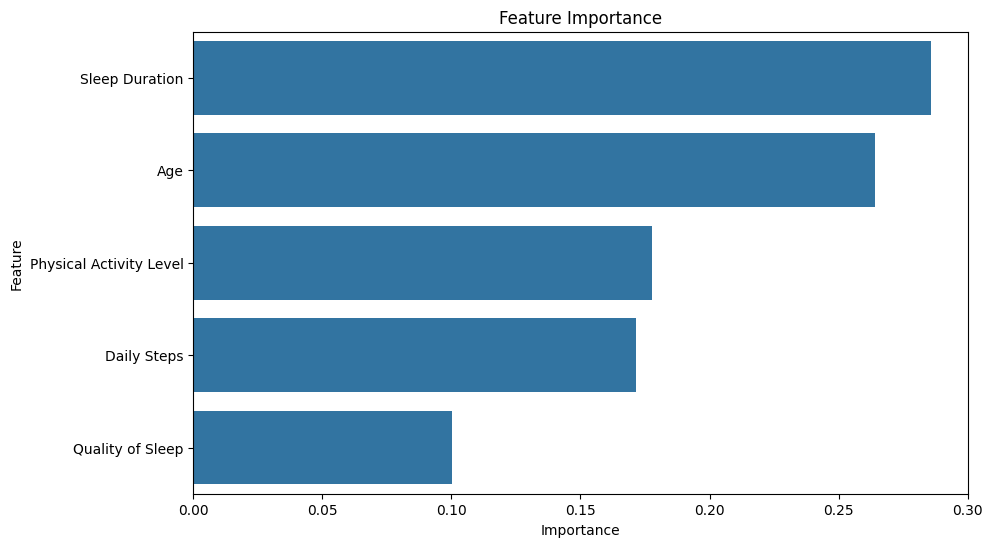

In [ ]:
# variabel yang paling berpengaruh dari feature yang terpilih terhadap target sleep disorder

# Assuming y_test and y_pred_test are your true and predicted labels for the test set
# and you've already trained a suitable model (e.g., a tree-based model like RandomForest)

# Example using RandomForestClassifier (you might need to adjust based on your actual model)
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)  # Initialize
rf_classifier.fit(X_train, y_train.values.ravel()) # Train

importances = rf_classifier.feature_importances_

# Print feature importances
for feature, importance in zip(features, importances):
  print(f"Feature: {feature}, Importance: {importance}")


# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)


# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.show()